In [1]:
## R code 7.1
library(rethinking)
data(rugged)
d <- rugged

# make log version of outcome
d$log_gdp <- log( d$rgdppc_2000 )

# extract countries with GDP data
dd <- d[ complete.cases(d$rgdppc_2000) , ]

# split countries into Africa and not-Africa
d.A1 <- dd[ dd$cont_africa==1 , ] # Africa
d.A0 <- dd[ dd$cont_africa==0 , ] # not Africa

Loading required package: rstan
Loading required package: ggplot2
rstan (Version 2.9.0, packaged: 2016-01-05 16:17:47 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.58)


In [2]:
## R code 7.2
# African nations
m7.1 <- map(
    alist(
        log_gdp ~ dnorm( mu , sigma ) ,
        mu <- a + bR*rugged ,
        a ~ dnorm( 8 , 100 ) ,
        bR ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 10 )
    ) ,
    data=d.A1 )

# non-African nations
m7.2 <- map(
    alist(
        log_gdp ~ dnorm( mu , sigma ) ,
        mu <- a + bR*rugged ,
        a ~ dnorm( 8 , 100 ) ,
        bR ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 10 )
    ) ,
    data=d.A0 )

In [3]:
## R code 7.3
m7.3 <- map(
    alist(
        log_gdp ~ dnorm( mu , sigma ) ,
        mu <- a + bR*rugged ,
        a ~ dnorm( 8 , 100 ) ,
        bR ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 10 )
    ) ,
    data=dd )

In [4]:
## R code 7.4
m7.4 <- map(
    alist(
        log_gdp ~ dnorm( mu , sigma ) ,
        mu <- a + bR*rugged + bA*cont_africa ,
        a ~ dnorm( 8 , 100 ) ,
        bR ~ dnorm( 0 , 1 ) ,
        bA ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 10 )
    ) ,
    data=dd )

In [5]:
## R code 7.5
compare( m7.3 , m7.4 )

      WAIC pWAIC dWAIC weight    SE   dSE
m7.4 476.4   4.4   0.0      1 15.29    NA
m7.3 539.4   2.6  62.9      0 13.24 15.05

In [6]:
## R code 7.6
rugged.seq <- seq(from=-1,to=8,by=0.25)

# compute mu over samples, fixing cont_africa=0
mu.NotAfrica <- link( m7.4 , data=data.frame(cont_africa=0,rugged=rugged.seq) )

# compute mu over samples, fixing cont_africa=1
mu.Africa <- link( m7.4 , data=data.frame(cont_africa=1,rugged=rugged.seq) )

# summarize to means and intervals
mu.NotAfrica.mean <- apply( mu.NotAfrica , 2 , mean )
mu.NotAfrica.PI <- apply( mu.NotAfrica , 2 , PI , prob=0.97 )
mu.Africa.mean <- apply( mu.Africa , 2 , mean )
mu.Africa.PI <- apply( mu.Africa , 2 , PI , prob=0.97 )

[ 1000 / 1000 ]
[ 1000 / 1000 ]


In [7]:
## R code 7.7
m7.5 <- map(
    alist(
        log_gdp ~ dnorm( mu , sigma ) ,
        mu <- a + gamma*rugged + bA*cont_africa ,
        gamma <- bR + bAR*cont_africa ,
        a ~ dnorm( 8 , 100 ) ,
        bA ~ dnorm( 0 , 1 ) ,
        bR ~ dnorm( 0 , 1 ) ,
        bAR ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 10 )
    ) ,
    data=dd )

In [8]:
## R code 7.8
compare( m7.3 , m7.4 , m7.5 )

      WAIC pWAIC dWAIC weight    SE   dSE
m7.5 469.3   5.2   0.0   0.97 15.08    NA
m7.4 476.2   4.3   6.9   0.03 15.39  6.16
m7.3 539.6   2.7  70.3   0.00 13.24 15.10

In [9]:
## R code 7.9
m7.5b <- map(
    alist(
        log_gdp ~ dnorm( mu , sigma ) ,
        mu <- a + bR*rugged + bAR*rugged*cont_africa + bA*cont_africa,
        a ~ dnorm( 8 , 100 ) ,
        bA ~ dnorm( 0 , 1 ) ,
        bR ~ dnorm( 0 , 1 ) ,
        bAR ~ dnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 10 )
    ) ,
    data=dd )

In [10]:
## R code 7.10
rugged.seq <- seq(from=-1,to=8,by=0.25)

mu.Africa <- link( m7.5 , data=data.frame(cont_africa=1,rugged=rugged.seq) )
mu.Africa.mean <- apply( mu.Africa , 2 , mean )
mu.Africa.PI <- apply( mu.Africa , 2 , PI , prob=0.97 )

mu.NotAfrica <- link( m7.5 , data=data.frame(cont_africa=0,rugged=rugged.seq) )
mu.NotAfrica.mean <- apply( mu.NotAfrica , 2 , mean )
mu.NotAfrica.PI <- apply( mu.NotAfrica , 2 , PI , prob=0.97 )

[ 1000 / 1000 ]
[ 1000 / 1000 ]


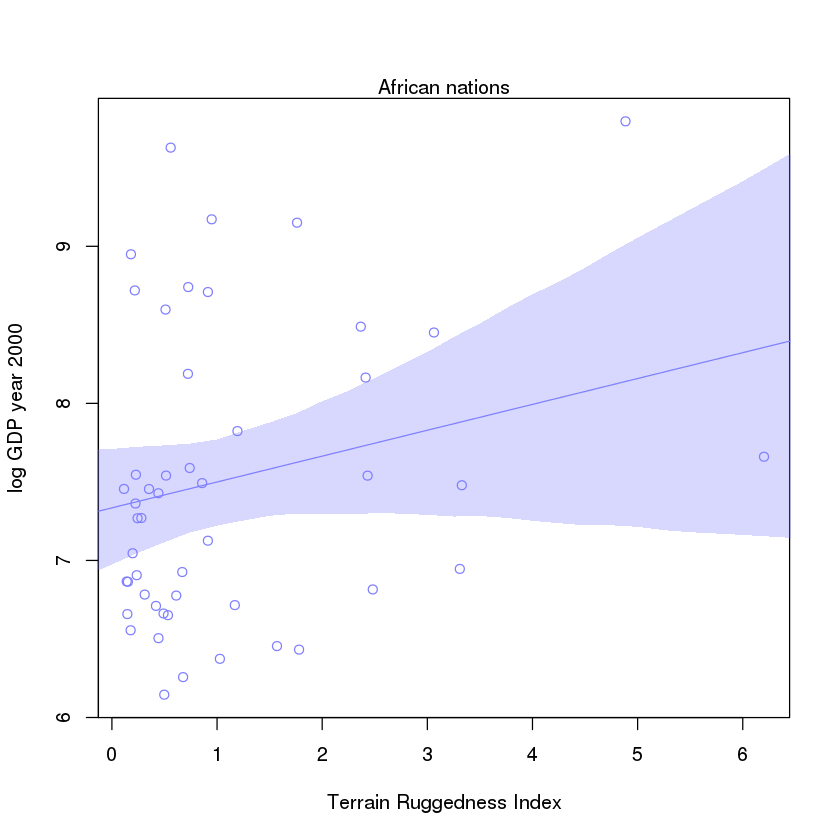

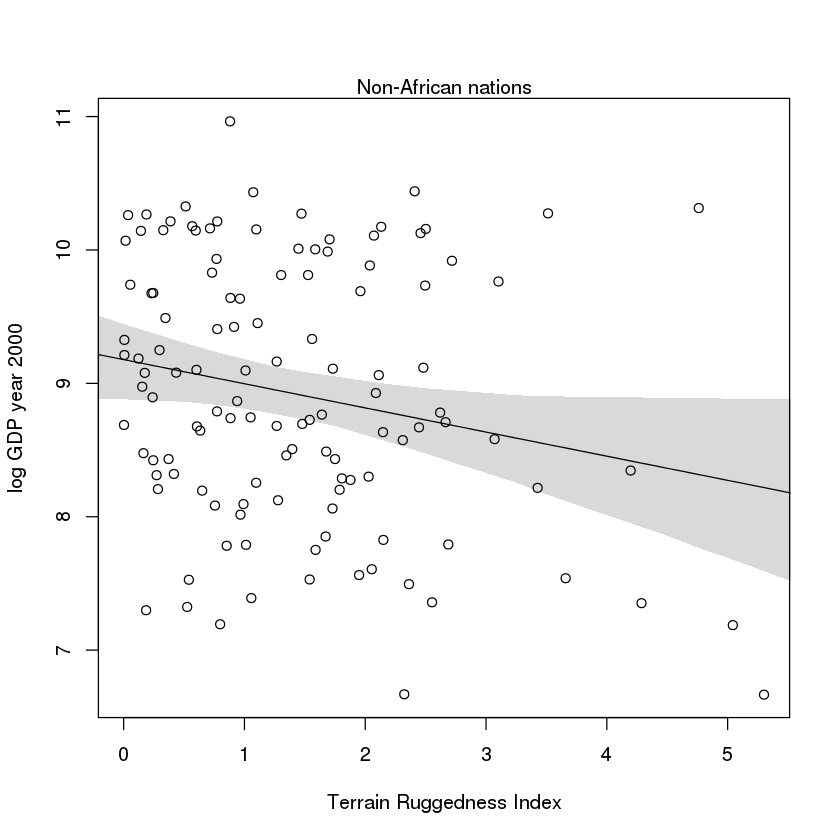

In [11]:
## R code 7.11
# plot African nations with regression
d.A1 <- dd[dd$cont_africa==1,]
plot( log(rgdppc_2000) ~ rugged , data=d.A1 ,
    col=rangi2 , ylab="log GDP year 2000" ,
    xlab="Terrain Ruggedness Index" )
mtext( "African nations" , 3 )
lines( rugged.seq , mu.Africa.mean , col=rangi2 )
shade( mu.Africa.PI , rugged.seq , col=col.alpha(rangi2,0.3) )

# plot non-African nations with regression
d.A0 <- dd[dd$cont_africa==0,]
plot( log(rgdppc_2000) ~ rugged , data=d.A0 ,
    col="black" , ylab="log GDP year 2000" ,
    xlab="Terrain Ruggedness Index" )
mtext( "Non-African nations" , 3 )
lines( rugged.seq , mu.NotAfrica.mean )
shade( mu.NotAfrica.PI , rugged.seq )

In [12]:
## R code 7.12
precis(m7.5)

       Mean StdDev  5.5% 94.5%
a      9.18   0.14  8.97  9.40
bA    -1.85   0.22 -2.20 -1.50
bR    -0.18   0.08 -0.31 -0.06
bAR    0.35   0.13  0.14  0.55
sigma  0.93   0.05  0.85  1.01

In [13]:
## R code 7.13
post <- extract.samples( m7.5 )
gamma.Africa <- post$bR + post$bAR*1
gamma.notAfrica <- post$bR + post$bAR*0

In [14]:
## R code 7.14
mean( gamma.Africa)
mean( gamma.notAfrica )

[1] 0.1653011

[1] -0.1833906

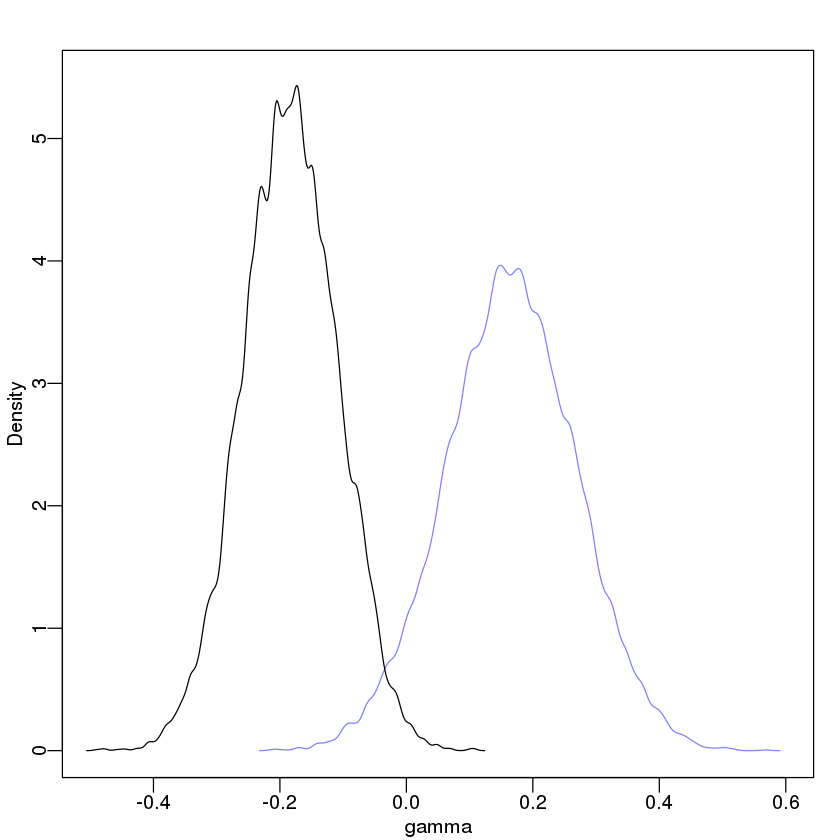

In [15]:
## R code 7.15
dens( gamma.Africa , xlim=c(-0.5,0.6) , ylim=c(0,5.5) ,
    xlab="gamma" , col=rangi2 )
dens( gamma.notAfrica , add=TRUE )

In [16]:
## R code 7.16
diff <- gamma.Africa - gamma.notAfrica
sum( diff < 0 ) / length( diff )

[1] 0.0031

[ 1000 / 1000 ]
[ 1000 / 1000 ]


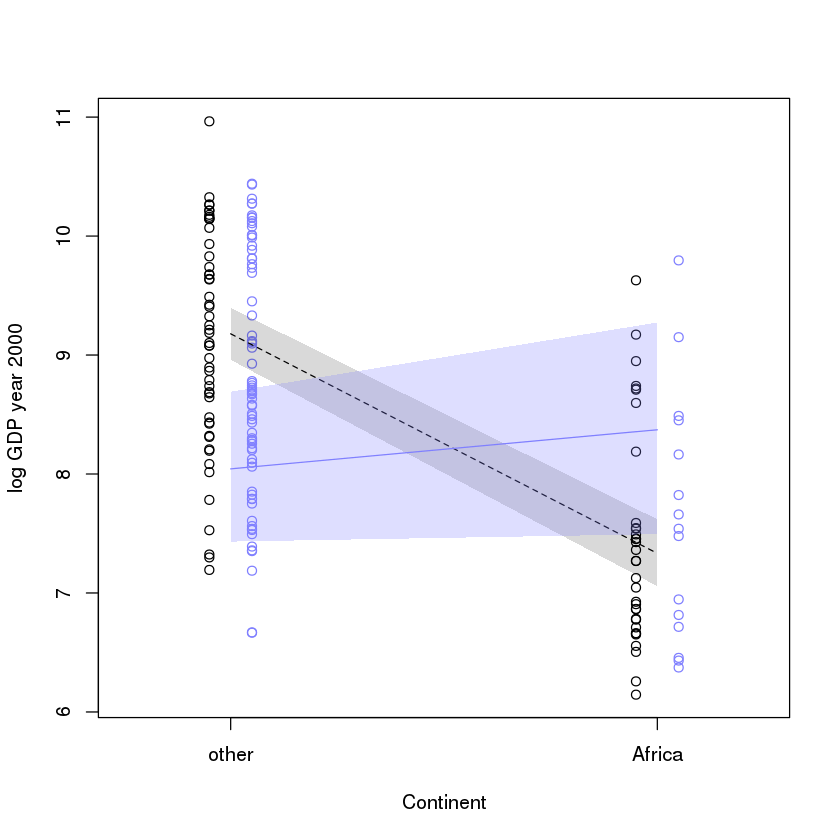

In [17]:
## R code 7.17
# get minimum and maximum rugged values
q.rugged <- range(dd$rugged)

# compute lines and confidence intervals
mu.ruggedlo <- link( m7.5 ,
    data=data.frame(rugged=q.rugged[1],cont_africa=0:1) )
mu.ruggedlo.mean <- apply( mu.ruggedlo , 2 , mean )
mu.ruggedlo.PI <- apply( mu.ruggedlo , 2 , PI )

mu.ruggedhi <- link( m7.5 ,
    data=data.frame(rugged=q.rugged[2],cont_africa=0:1) )
mu.ruggedhi.mean <- apply( mu.ruggedhi , 2 , mean )
mu.ruggedhi.PI <- apply( mu.ruggedhi , 2 , PI )

# plot it all, splitting points at median
med.r <- median(dd$rugged)
ox <- ifelse( dd$rugged > med.r , 0.05 , -0.05 )
plot( dd$cont_africa + ox , log(dd$rgdppc_2000) ,
    col=ifelse(dd$rugged>med.r,rangi2,"black") ,
    xlim=c(-0.25,1.25) , xaxt="n" , ylab="log GDP year 2000" ,
    xlab="Continent" )
axis( 1 , at=c(0,1) , labels=c("other","Africa") )
lines( 0:1 , mu.ruggedlo.mean , lty=2 )
shade( mu.ruggedlo.PI , 0:1 )
lines( 0:1 , mu.ruggedhi.mean , col=rangi2 )
shade( mu.ruggedhi.PI , 0:1 , col=col.alpha(rangi2,0.25) )

In [18]:
## R code 7.18
library(rethinking)
data(tulips)
d <- tulips
str(d)

'data.frame':	27 obs. of  4 variables:
 $ bed   : Factor w/ 3 levels "a","b","c": 1 1 1 1 1 1 1 1 1 2 ...
 $ water : int  1 1 1 2 2 2 3 3 3 1 ...
 $ shade : int  1 2 3 1 2 3 1 2 3 1 ...
 $ blooms: num  0 0 111 183.5 59.2 ...


In [19]:
## R code 7.19
m7.6 <- map(
    alist(
        blooms ~ dnorm( mu , sigma ) ,
        mu <- a + bW*water + bS*shade ,
        a ~ dnorm( 0 , 100 ) ,
        bW ~ dnorm( 0 , 100 ) ,
        bS ~ dnorm( 0 , 100 ) ,
        sigma ~ dunif( 0 , 100 )
    ) ,
    data=d )
m7.7 <- map(
    alist(
        blooms ~ dnorm( mu , sigma ) ,
        mu <- a + bW*water + bS*shade + bWS*water*shade ,
        a ~ dnorm( 0 , 100 ) ,
        bW ~ dnorm( 0 , 100 ) ,
        bS ~ dnorm( 0 , 100 ) ,
        bWS ~ dnorm( 0 , 100 ) ,
        sigma ~ dunif( 0 , 100 )
    ) ,
    data=d )

Caution, model may not have converged.
Code 1: Maximum iterations reached.


In [20]:
## R code 7.20
m7.6 <- map(
    alist(
        blooms ~ dnorm( mu , sigma ) ,
        mu <- a + bW*water + bS*shade ,
        a ~ dnorm( 0 , 100 ) ,
        bW ~ dnorm( 0 , 100 ) ,
        bS ~ dnorm( 0 , 100 ) ,
        sigma ~ dunif( 0 , 100 )
    ) ,
    data=d ,
    method="Nelder-Mead" ,
    control=list(maxit=1e4) )
m7.7 <- map(
    alist(
        blooms ~ dnorm( mu , sigma ) ,
        mu <- a + bW*water + bS*shade + bWS*water*shade ,
        a ~ dnorm( 0 , 100 ) ,
        bW ~ dnorm( 0 , 100 ) ,
        bS ~ dnorm( 0 , 100 ) ,
        bWS ~ dnorm( 0 , 100 ) ,
        sigma ~ dunif( 0 , 100 )
    ) ,
    data=d ,
    method="Nelder-Mead" ,
    control=list(maxit=1e4) )

In [21]:
## R code 7.21
coeftab(m7.6,m7.7)

Warning message:
In sqrt(diag(vcov(model))): NaNs produced

      m7.6    m7.7   
a       53.47 -156.84
bW      76.37  184.59
bS     -38.93   51.27
sigma   57.38   96.78
bWS        NA  -48.16
nobs       27      27

In [22]:
## R code 7.22
compare( m7.6 , m7.7 )

ERROR: Error in mvrnorm(n = n, mu = mu, Sigma = vcov(object)): 'Sigma' is not positive definite


In [23]:
## R code 7.23
d$shade.c <- d$shade - mean(d$shade)
d$water.c <- d$water - mean(d$water)

In [24]:
## R code 7.24
m7.8 <- map(
    alist(
        blooms ~ dnorm( mu , sigma ) ,
        mu <- a + bW*water.c + bS*shade.c ,
        a ~ dnorm( 130 , 100 ) ,
        bW ~ dnorm( 0 , 100 ) ,
        bS ~ dnorm( 0 , 100 ) ,
        sigma ~ dunif( 0 , 100 )
    ) ,
    data=d ,
    start=list(a=mean(d$blooms),bW=0,bS=0,sigma=sd(d$blooms)) )
m7.9 <- map(
    alist(
        blooms ~ dnorm( mu , sigma ) ,
        mu <- a + bW*water.c + bS*shade.c + bWS*water.c*shade.c ,
        a ~ dnorm( 130 , 100 ) ,
        bW ~ dnorm( 0 , 100 ) ,
        bS ~ dnorm( 0 , 100 ) ,
        bWS ~ dnorm( 0 , 100 ) ,
        sigma ~ dunif( 0 , 100 )
    ) ,
    data=d ,
    start=list(a=mean(d$blooms),bW=0,bS=0,bWS=0,sigma=sd(d$blooms)) )
coeftab(m7.8,m7.9)

      m7.8    m7.9   
a      129.00  129.01
bW      74.22   74.96
bS     -40.74  -41.14
sigma   57.35   45.22
bWS        NA  -51.87
nobs       27      27

In [25]:
## R code 7.25
k <- coef(m7.7)
k[1] + k[2]*2 + k[3]*2 + k[4]*2*2

a 
122.2249

In [26]:
## R code 7.26
k <- coef(m7.9)
k[1] + k[2]*0 + k[3]*0 + k[4]*0*0

a 
129.008

In [27]:
## R code 7.27
precis(m7.9)

        Mean StdDev   5.5%  94.5%
a     129.01   8.67 115.15 142.87
bW     74.96  10.60  58.02  91.90
bS    -41.14  10.60 -58.08 -24.20
bWS   -51.87  12.95 -72.57 -31.18
sigma  45.22   6.15  35.39  55.06

[ 1000 / 1000 ]
[ 1000 / 1000 ]
[ 1000 / 1000 ]


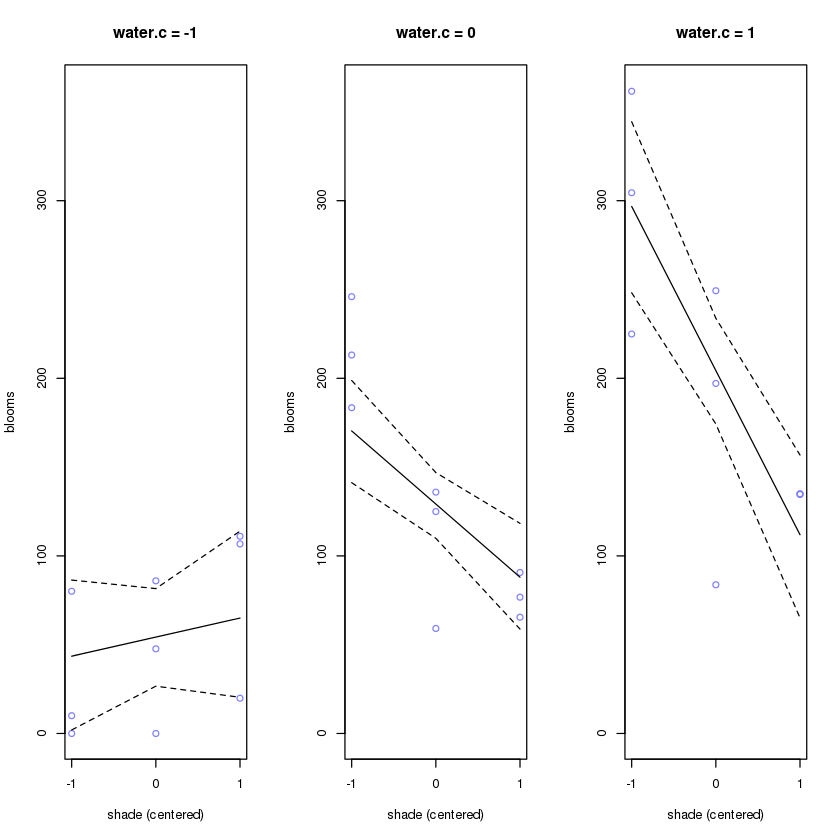

In [28]:
## R code 7.28
# make a plot window with three panels in a single row
par(mfrow=c(1,3)) # 1 row, 3 columns

# loop over values of water.c and plot predictions
shade.seq <- -1:1
for ( w in -1:1 ) {
    dt <- d[d$water.c==w,]
    plot( blooms ~ shade.c , data=dt , col=rangi2 ,
        main=paste("water.c =",w) , xaxp=c(-1,1,2) , ylim=c(0,362) ,
        xlab="shade (centered)" )
    mu <- link( m7.9 , data=data.frame(water.c=w,shade.c=shade.seq) )
    mu.mean <- apply( mu , 2 , mean )
    mu.PI <- apply( mu , 2 , PI , prob=0.97 )
    lines( shade.seq , mu.mean )
    lines( shade.seq , mu.PI[1,] , lty=2 )
    lines( shade.seq , mu.PI[2,] , lty=2 )
}

In [29]:
## R code 7.29
m7.x <- lm( y ~ x + z + x*z , data=d )

ERROR: Error in eval(expr, envir, enclos): object 'y' not found


In [30]:
## R code 7.30
m7.x <- lm( y ~ x*z , data=d )

ERROR: Error in eval(expr, envir, enclos): object 'y' not found


In [31]:
## R code 7.31
m7.x <- lm( y ~ x + x*z - z , data=d )

ERROR: Error in eval(expr, envir, enclos): object 'y' not found


In [32]:
## R code 7.32
m7.x <- lm( y ~ x*z*w , data=d )

ERROR: Error in eval(expr, envir, enclos): object 'y' not found


In [33]:
## R code 7.33
x <- z <- w <- 1
colnames( model.matrix(~x*z*w) )

[1] "(Intercept)" "x"           "z"           "w"           "x:z"        
[6] "x:w"         "z:w"         "x:z:w"

In [34]:
## R code 7.34
d$lang.per.cap <- d$num.lang / d$k.pop

ERROR: Error in `$<-.data.frame`(`*tmp*`, "lang.per.cap", value = numeric(0)): replacement has 0 rows, data has 27
